<a href="https://colab.research.google.com/github/huytuan3108/bai_tap_fuzzy/blob/main/b4_of_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

số lg đơn hàng cần kết hợp: 4.93607305936073
ưu tiên giao hàng: 4.301587301587302


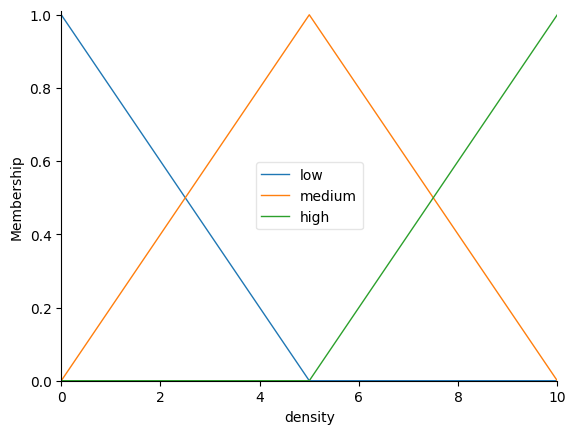

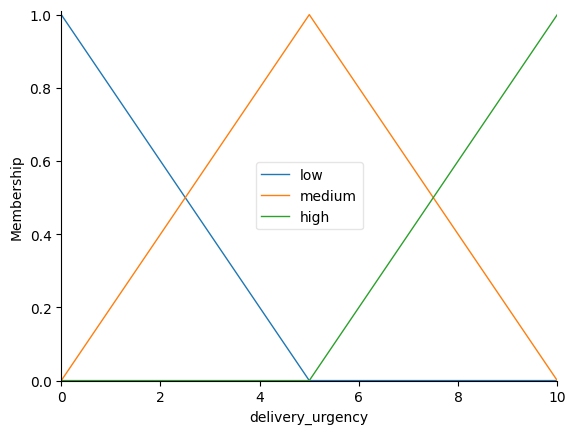

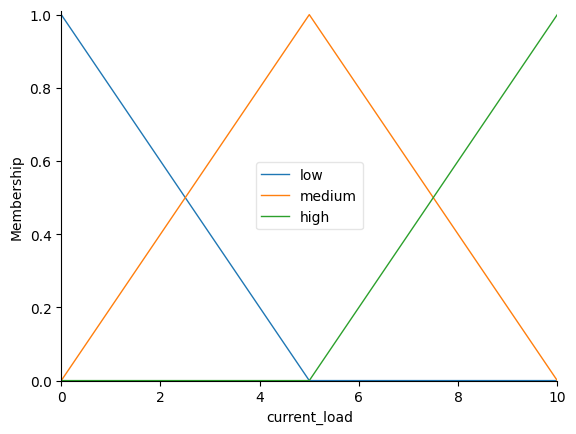

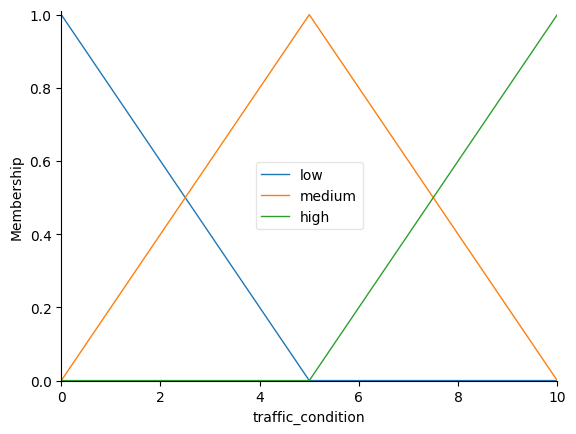

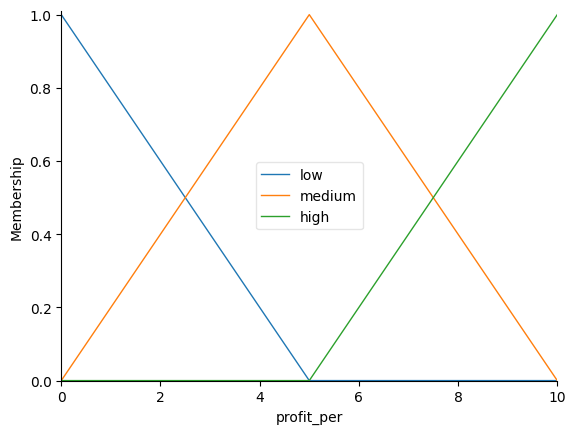

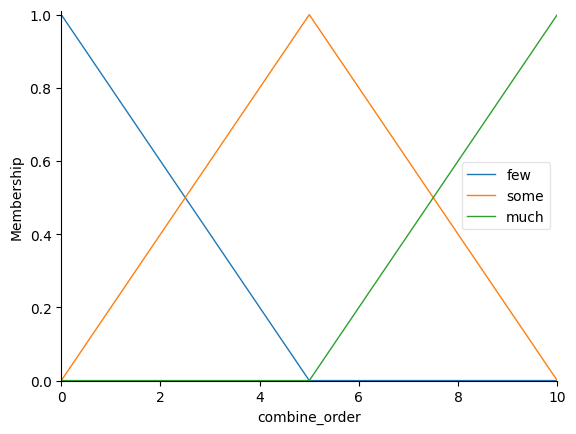

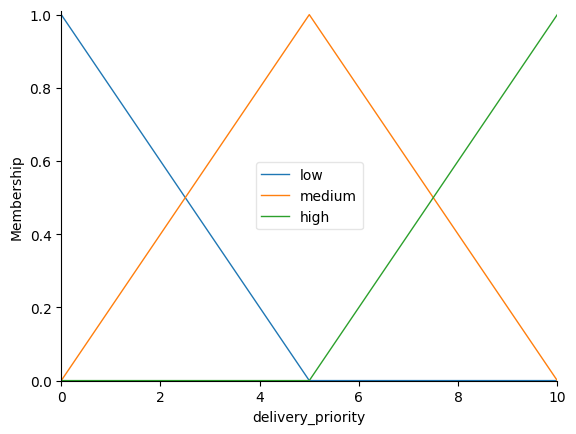

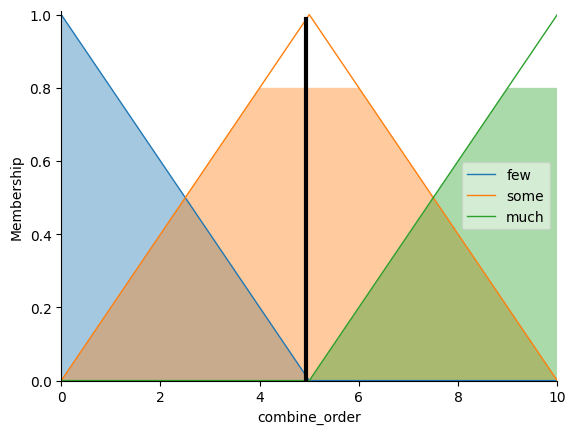

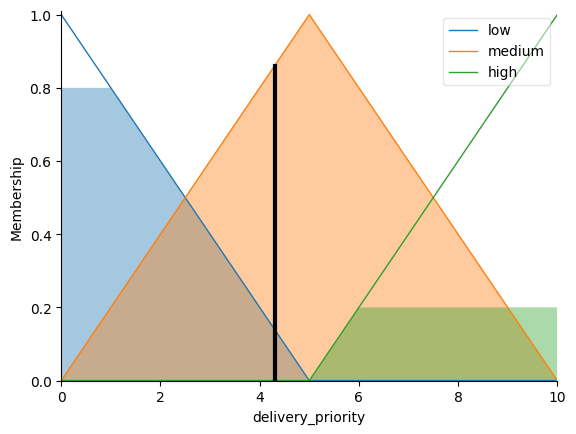

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
density=ctrl.Antecedent(np.arange(0,10.1,1), 'density')
delivery_urgency=ctrl.Antecedent(np.arange(0,10.1,1),'delivery_urgency')
current_load=ctrl.Antecedent(np.arange(0,10.1,1), 'current_load')
traffic_condition=ctrl.Antecedent(np.arange(0,10.1,1), 'traffic_condition')
profit_per=ctrl.Antecedent(np.arange(0,10.1,1), 'profit_per')
combine_order = ctrl.Consequent(np.arange(0,10.1,1), 'combine_order')
delivery_priority = ctrl.Consequent(np.arange(0,10.1,1), 'delivery_priority')
density['low']=fuzz.trimf(density.universe, [0,0,5])
density['medium']=fuzz.trimf(density.universe, [0,5,10])
density['high']=fuzz.trimf(density.universe, [5,10,10])
density.view()
delivery_urgency['low']=fuzz.trimf(delivery_urgency.universe, [0,0,5])
delivery_urgency['medium']=fuzz.trimf(delivery_urgency.universe, [0,5,10])
delivery_urgency['high']=fuzz.trimf(delivery_urgency.universe, [5,10,10])
delivery_urgency.view()
current_load['low']=fuzz.trimf(current_load.universe, [0,0,5])
current_load['medium']=fuzz.trimf(current_load.universe, [0,5,10])
current_load['high']=fuzz.trimf(current_load.universe, [5,10,10])
current_load.view()
traffic_condition['low']=fuzz.trimf(traffic_condition.universe, [0,0,5])
traffic_condition['medium']=fuzz.trimf(traffic_condition.universe, [0,5,10])
traffic_condition['high']=fuzz.trimf(traffic_condition.universe, [5,10,10])
traffic_condition.view()
profit_per['low']=fuzz.trimf(profit_per.universe, [0,0,5])
profit_per['medium']=fuzz.trimf(profit_per.universe, [0,5,10])
profit_per['high']=fuzz.trimf(profit_per.universe, [5,10,10])
profit_per.view()
combine_order['few']=fuzz.trimf(combine_order.universe, [0,0,5])
combine_order['some']=fuzz.trimf(combine_order.universe, [0,5,10])
combine_order['much']=fuzz.trimf(combine_order.universe, [5,10,10])
combine_order.view()
delivery_priority['low']=fuzz.trimf(delivery_priority.universe, [0,0,5])
delivery_priority['medium']=fuzz.trimf(delivery_priority.universe, [0,5,10])
delivery_priority['high']=fuzz.trimf(delivery_priority.universe, [5,10,10])
delivery_priority.view()
rule1=ctrl.Rule(density['high'] | current_load['low'] | traffic_condition['low'], combine_order['much'])
rule2=ctrl.Rule(density['medium'] | traffic_condition['high'] | delivery_urgency['medium'], combine_order['few'])
rule3=ctrl.Rule(current_load['high'] | density['high'] | profit_per['medium'], combine_order['some'])
rule4=ctrl.Rule(density['low'] | delivery_urgency['high'] | traffic_condition['medium'], combine_order['few'])
rule5=ctrl.Rule(profit_per['high'] | delivery_urgency['high'] | traffic_condition['high'], combine_order['few'])
rule6=ctrl.Rule(delivery_urgency['high'] | profit_per['high'], delivery_priority['high'])
rule7=ctrl.Rule(delivery_urgency['medium'] | traffic_condition['medium'], delivery_priority['medium'])
rule8=ctrl.Rule(delivery_urgency['low'] | density['high'] | profit_per['low'], delivery_priority['low'])
control_system= ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['density']=9
fuzzy_system.input['delivery_urgency']=6
fuzzy_system.input['current_load']=2
fuzzy_system.input['traffic_condition']=5
fuzzy_system.input['profit_per']=6
fuzzy_system.compute()
print("số lg đơn hàng cần kết hợp:", fuzzy_system.output['combine_order'])
print("ưu tiên giao hàng:", fuzzy_system.output['delivery_priority'])
combine_order.view(sim=fuzzy_system)
delivery_priority.view(sim=fuzzy_system)